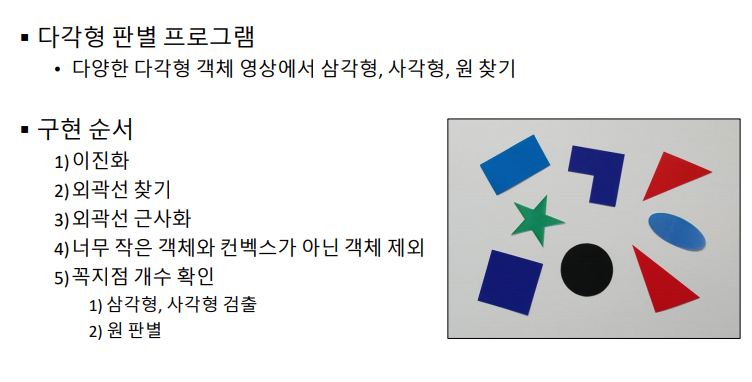

In [3]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
import math

!pip install opencv-python

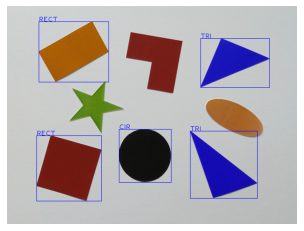

In [4]:
def setLabel(img, pts, label):
    (x, y, w, h) = cv2.boundingRect(pts)
    pt1 = (x, y)
    pt2 = (x + w, y + h)
    cv2.rectangle(img, pt1, pt2, (0, 0, 255), 1)
    cv2.putText(img, label, pt1, cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255))


def main():
    img = cv2.imread('polygon.bmp', cv2.IMREAD_COLOR)

    if img is None:
        print('Image load failed!')
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #그레이스케일로 변환
    _, img_bin = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    #스레시홀드를 하는데 오츠로 자동으로 한다. 다만 INV로 해준다. img_bin에저장
    contours, _ = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    #findContours로 각각의 객체를 찾아냄
    #EXTERNAL로 바깥쪽만 찾아냄
    for pts in contours:#pts가 객체하나하나의 외곽선을 ndarray로 받는다.
        if cv2.contourArea(pts) < 400:  #  너무 작으면 무시
            continue
            #노이즈 제거
        approx = cv2.approxPolyDP(pts, cv2.arcLength(pts, True)*0.02, True)

        vtc = len(approx)

        if vtc == 3:
            setLabel(img, pts, 'TRI')
        elif vtc == 4:
            setLabel(img, pts, 'RECT')
        else:
            length = cv2.arcLength(pts, True)
            area = cv2.contourArea(pts)
            ratio = 4. * math.pi * area / (length * length)

            if ratio > 0.85:
                setLabel(img, pts, 'CIR')
    
    plt.axis('off'),plt.imshow(img)
    
    #cv2.imshow('img', img)
    #cv2.waitKey()
    #cv2.destroyAllWindows()


if __name__ == '__main__':
    main()


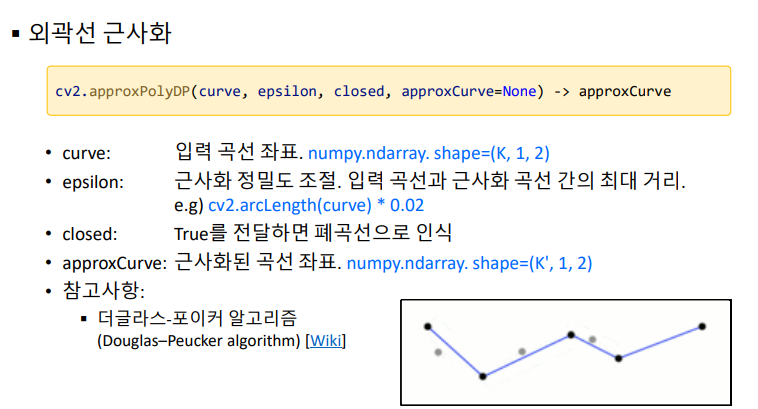
approxPolyDP 함수를 통하여 근사화된 곡선 좌표값을 받습니다.  
K는 개수,1은 더미, 2는 xy좌표입니다.  
- 0.02로 마진을 선정해 줍니다.